# Análisis exploratorio de datos tabulados

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Lectura de los datos

df = pd.read_csv("Human_Resources.csv")
df

In [ ]:
pd.set_option("display.max_columns", None) #Que muestre todas las columnas
df.head(3)

In [ ]:
df.info()

In [ ]:
df["Age"].unique() #Para ver los valores únicos de la columna

In [ ]:
df.nunique() #Cuenta los valores únicos en todas las columnas

In [ ]:
df.columns.to_list() #Genera una lista de los nombres de las columnas
for name in df.columns.to_list():
    print(f"La columna: {name} contiene los elementos {df[name].unique()}")

In [ ]:
#Eliminar columnas que no brindan información
valores_unicos_n = df.nunique()
columnas_sn_info = valores_unicos_n[valores_unicos_n == 1].index.tolist()
columnas_sn_info

In [ ]:
#Elimina las columnas del dataframe original
# df.drop(columnas_sn_info, axis=1, inplace=True) #axis=0 quiere decir filas, axis=1 columnas. inplace es para decirle que modifique el df original

In [ ]:
df_clean = df.drop(columnas_sn_info, axis=1) #Guarda otro dataframe con las columnas eliminadas

In [ ]:
df_clean.describe()

## Personas que siguen trabajando con la empresa (División de un dataset)

In [ ]:
siguen_trabajando = df_clean[df_clean["Attrition"] == "No"]
renunciaron = df_clean[df_clean["Attrition"] == "Yes"]

In [ ]:
renunciaron.describe()

In [ ]:
siguen_trabajando.describe()

In [ ]:
personas_sueldo_bien = siguen_trabajando[(siguen_trabajando["MonthlyIncome"] > 10000) & (siguen_trabajando["MonthlyIncome"] < 15000)]
personas_sueldo_bien.describe()

# Extraer numeros de una columna

In [ ]:
import re
data = {"mezclados": ["4565dfdsf", "545454dsdfsdf", "r8e7r54e", "ffe7s4f8f"]}
df = pd.DataFrame(data)

In [ ]:
data_num = "4526dfdsf"
numero = re.search(r"\d+", data_num)
int(numero.group())

In [ ]:
def extract_numbers(s):
    numero = re.search(r"\d+",s)
    return int(numero.group()) if numero else np.nan

In [ ]:
df["numerico"] = df["mezclados"].apply(extract_numbers)
df

# Tratamiento de datos faltantes

In [ ]:
# Contamos cuantos valores nulos tenemos por cada columna
valores_nulos = df_clean.isnull().sum()
porcentaje = (valores_nulos / len(df_clean)) * 100
porcentaje

In [ ]:
df_clean_sn_na = df_clean.dropna(subset = ["MonthlyIncome", "Department"]) #Se eliminan las filas de datos que en esas columnas tengan null
#df_clean["MonthlyIncome"] = df_clean["MonthlyIncome"].fillna(subset = ["MonthlyIncome"].mean())

In [ ]:
df_clean_sn_na.isnull().sum()

In [ ]:
%pip install -U scikit-learn

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

impute_numeric = SimpleImputer(strategy = "mean")
numeric_columns = df_clean.select_dtypes(include = "number").columns
numeric_columns

In [ ]:
df_clean[numeric_columns] = impute_numeric.fit_transform(df_clean[numeric_columns])



In [ ]:
impute_categorico = SimpleImputer(strategy = "most_frequent")
categorical_columns = df_clean.select_dtypes(include = "object").columns
df_clean[categorical_columns] = impute_categorico.fit_transform(df_clean[categorical_columns])

# Tratar con datos nominales y ordinales

In [ ]:
for name in df_clean.columns.to_list():
    print(f"{name} : {df_clean[name].unique()}")
    print("\n")

In [ ]:
# Variables ordinales

Attrition_labels = {"Yes":1, "No":0}

df_clean["Attrition"] = df_clean["Attrition"].map(Attrition_labels)

In [ ]:
#Variables Nominales
df_clean = pd.get_dummies(df_clean, columns = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"])

In [47]:
df_clean

,Age,MonthlyIncome,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41.0,5993.000000,1,1102.0,1.0,2.0,1.0,2.0,94.0,3.0,2.0,4.0,19479.0,8.0,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True
1,49.0,6505.155419,0,279.0,8.0,1.0,2.0,3.0,61.0,2.0,2.0,2.0,24907.0,1.0,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False
2,37.0,2090.000000,1,1373.0,2.0,2.0,4.0,4.0,92.0,2.0,1.0,3.0,2396.0,6.0,15.0,3.0,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True
3,33.0,2909.000000,0,1392.0,3.0,4.0,5.0,4.0,56.0,3.0,1.0,3.0,23159.0,1.0,11.0,3.0,3.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True
4,27.0,3468.000000,0,591.0,2.0,1.0,7.0,1.0,40.0,3.0,1.0,2.0,16632.0,9.0,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,2571.000000,0,884.0,23.0,2.0,2061.0,3.0,41.0,4.0,2.0,4.0,12290.0,4.0,17.0,3.0,3.0,1.0,17.0,3.0,3.0,5.0,2.0,0.0,3.0,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False
1466,39.0,9991.000000,0,613.0,6.0,1.0,2062.0,4.0,42.0,2.0,3.0,1.0,21457.0,4.0,15.0,3.0,1.0,1.0,9.0,5.0,3.0,7.0,7.0,1.0,7.0,False,False,True,False,True,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,True,False
1467,27.0,6142.000000,0,155.0,4.0,3.0,2064.0,2.0,87.0,4.0,2.0,2.0,5174.0,1.0,20.0,4.0,2.0,1.0,6.0,0.0,3.0,6.0,2.0,0.0,3.0,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
1468,49.0,5390.000000,0,1023.0,2.0,3.0,2065.0,4.0,63.0,2.0,2.0,2.0,13243.0,2.0,14.0,3.0,4.0,0.0,17.0,3.0,2.0,9.0,6.0,0.0,8.0,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False


In [ ]:
#Exportar los datos a csv
df_clean.to_csv("Preproced.csv", index=False)

# Detección de valores atípicos

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df_clean["Age"], bins=30)
#sns.displot(x=df_clean["Age"])

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df_clean.boxplot(column="Age")

# Simulación de datos atípicos

In [ ]:
#Cálculo de cuartiles
Q1 = df_clean["Age"].quantile(0.25)
Q3 = df_clean["Age"].quantile(0.75)
IQR = Q3 -Q1 #Rango intercuartil
limite_inferior = Q1 - 1.5 * IQR
limite_inferior 
limite_superior = Q3 + 1.5 * IQR
limite_superior

In [44]:
import numpy as np
df_test = df_clean.copy()

indices = np.random.choice(df_test.index, 2, replace = False)
df_test.loc[indices[0], "Age"] += 3 * IQR
df_test.loc[indices[1], "Age"] += 3 * IQR

<Axes: >

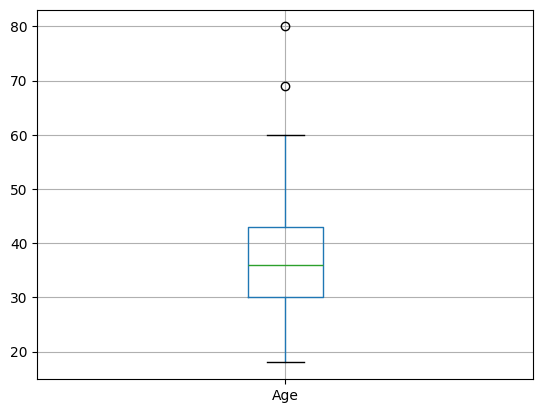

In [45]:
df_test.boxplot(column="Age")


# Ejercicio 3

Tomar 3 variables y determinar si existen datos atípicos

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        <Axe

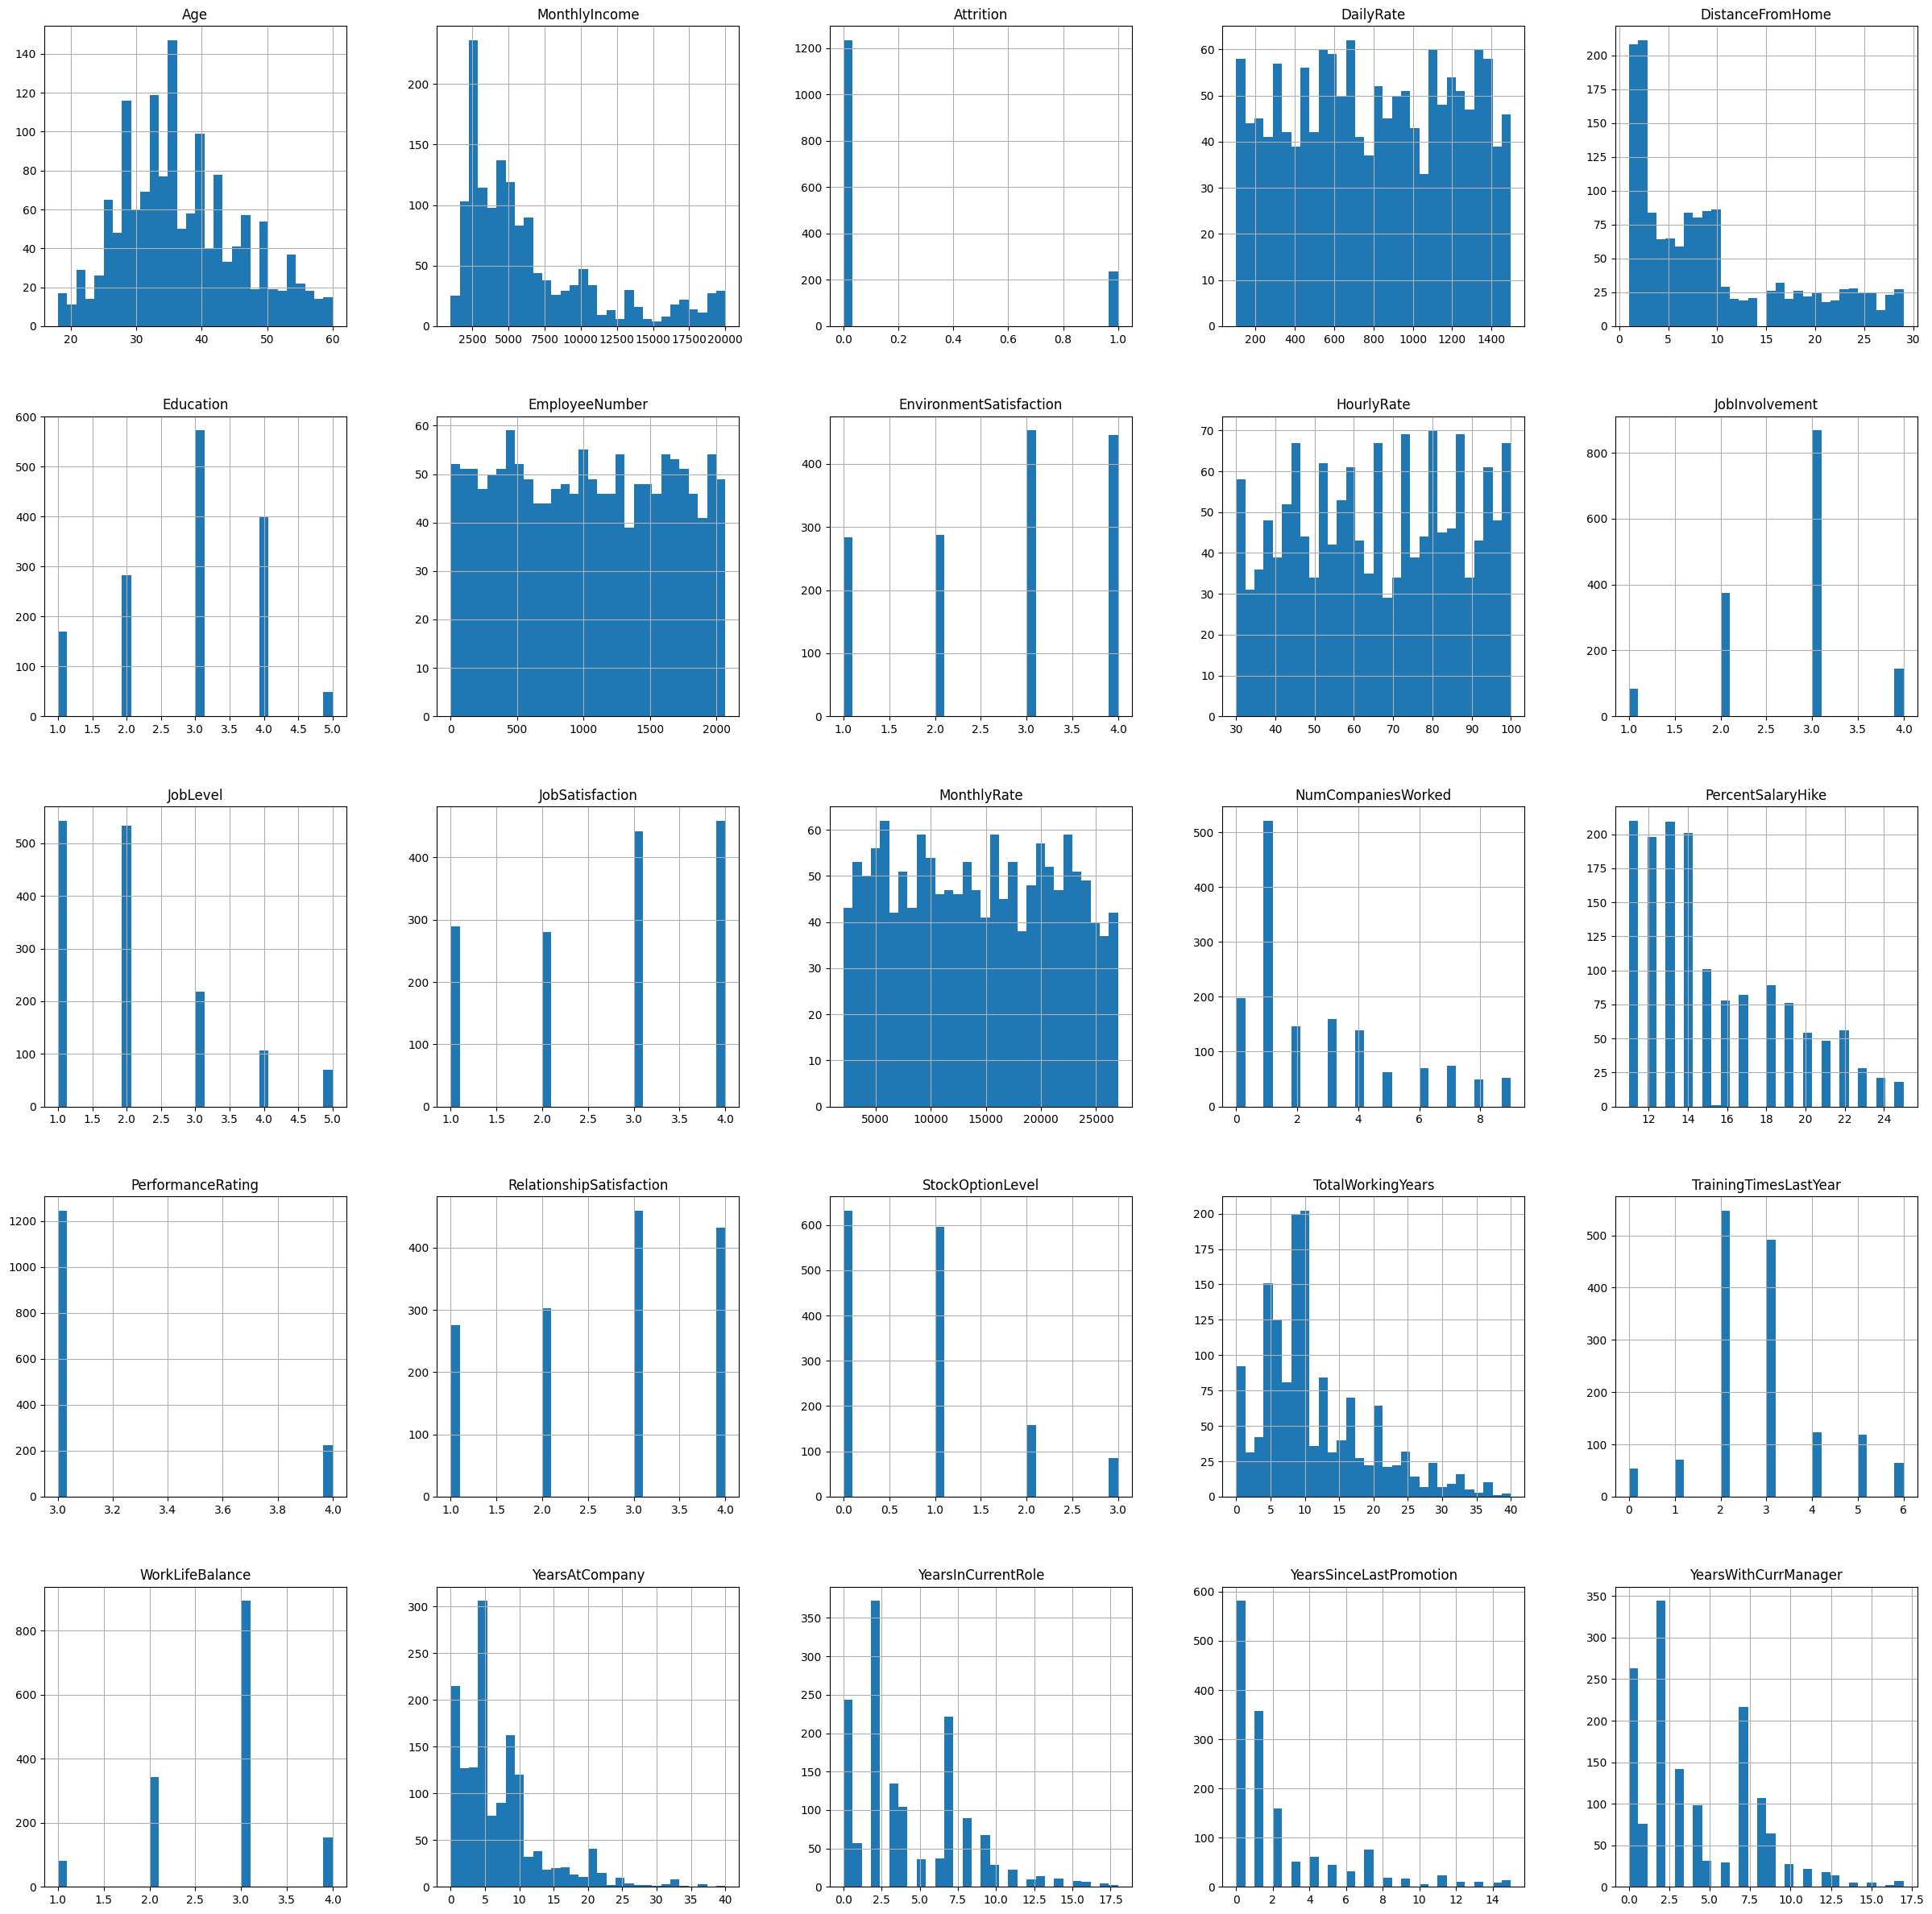

In [57]:
df_clean.hist(bins=30, figsize=(30,30))

In [66]:
# Años totales trabajados
Q1 = df_clean["TotalWorkingYears"].quantile(0.25)
Q3 = df_clean["TotalWorkingYears"].quantile(0.75)
IQR = Q3 -Q1 #Rango intercuartil
limite_inferior = Q1 - 1.5 * IQR
print(f"Lim. inferior: {limite_inferior}")
limite_superior = Q3 + 1.5 * IQR
print(f"Lim. superior: {limite_superior}")

Lim. inferior: -7.5
Lim. superior: 28.5


In [65]:
#Salario mensual
Q1 = df_clean["MonthlyIncome"].quantile(0.25)
Q3 = df_clean["MonthlyIncome"].quantile(0.75)
IQR = Q3 -Q1 #Rango intercuartil
limite_inferior = Q1 - 1.5 * IQR
print(f"Lim. inferior: {limite_inferior}")
limite_superior = Q3 + 1.5 * IQR
print(f"Lim. superior: {limite_superior}")
#No se puede usar muy bien este método porque la distribución no es muy normal

Lim. inferior: -5265.875
Lim. superior: 16549.125


In [64]:
#Numero de compañias donde se ha trabajado
Q1 = df_clean["NumCompaniesWorked"].quantile(0.25)
Q3 = df_clean["NumCompaniesWorked"].quantile(0.75)
IQR = Q3 -Q1 #Rango intercuartil
limite_inferior = Q1 - 1.5 * IQR
print(f"Lim. inferior: {limite_inferior}")
limite_superior = Q3 + 1.5 * IQR
print(f"Lim. superior: {limite_superior}")
#No se puede usar muy bien este método porque la distribución no es muy normal

Lim. inferior: -3.5
Lim. superior: 8.5


Text(0.5, 1.0, 'Numero de compañias trabajadas')

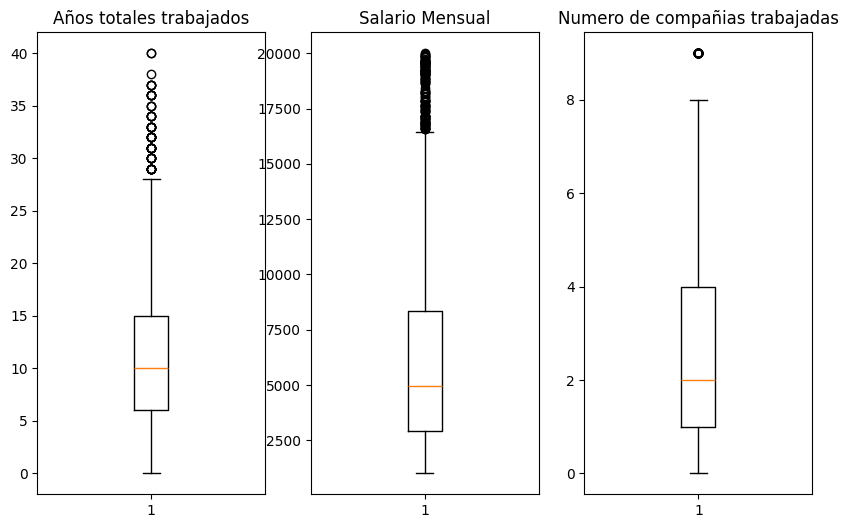

In [63]:
#Graficas de cajas y bigotes
fig, axs = plt.subplots(1,3, figsize = (10,6))
axs[0].boxplot(df_clean["TotalWorkingYears"])
axs[0].set_title("Años totales trabajados")
axs[1].boxplot(df_clean["MonthlyIncome"])
axs[1].set_title("Salario Mensual")
axs[2].boxplot(df_clean["NumCompaniesWorked"])
axs[2].set_title("Numero de compañias trabajadas")
#En ninguna variable se pueden determinar los valores atípicos con este método

# I Trees, Bosques de aislamiento

In [67]:
from sklearn.ensemble import IsolationForest

In [72]:
forest = IsolationForest(contamination="auto").fit(df_clean[["Age"]])

In [69]:
forest.predict(df_clean[["Age"]]) #1 es no atípico y -1 es atípico
#Primero tendríamos que hacer datasets de entrenamiento y predicción para poder hacer predicciones

array([ 1, -1,  1, ...,  1, -1,  1])

# Selección de Variables

In [86]:
%pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 330.3 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 409.6 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 656.4 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<Axes: >

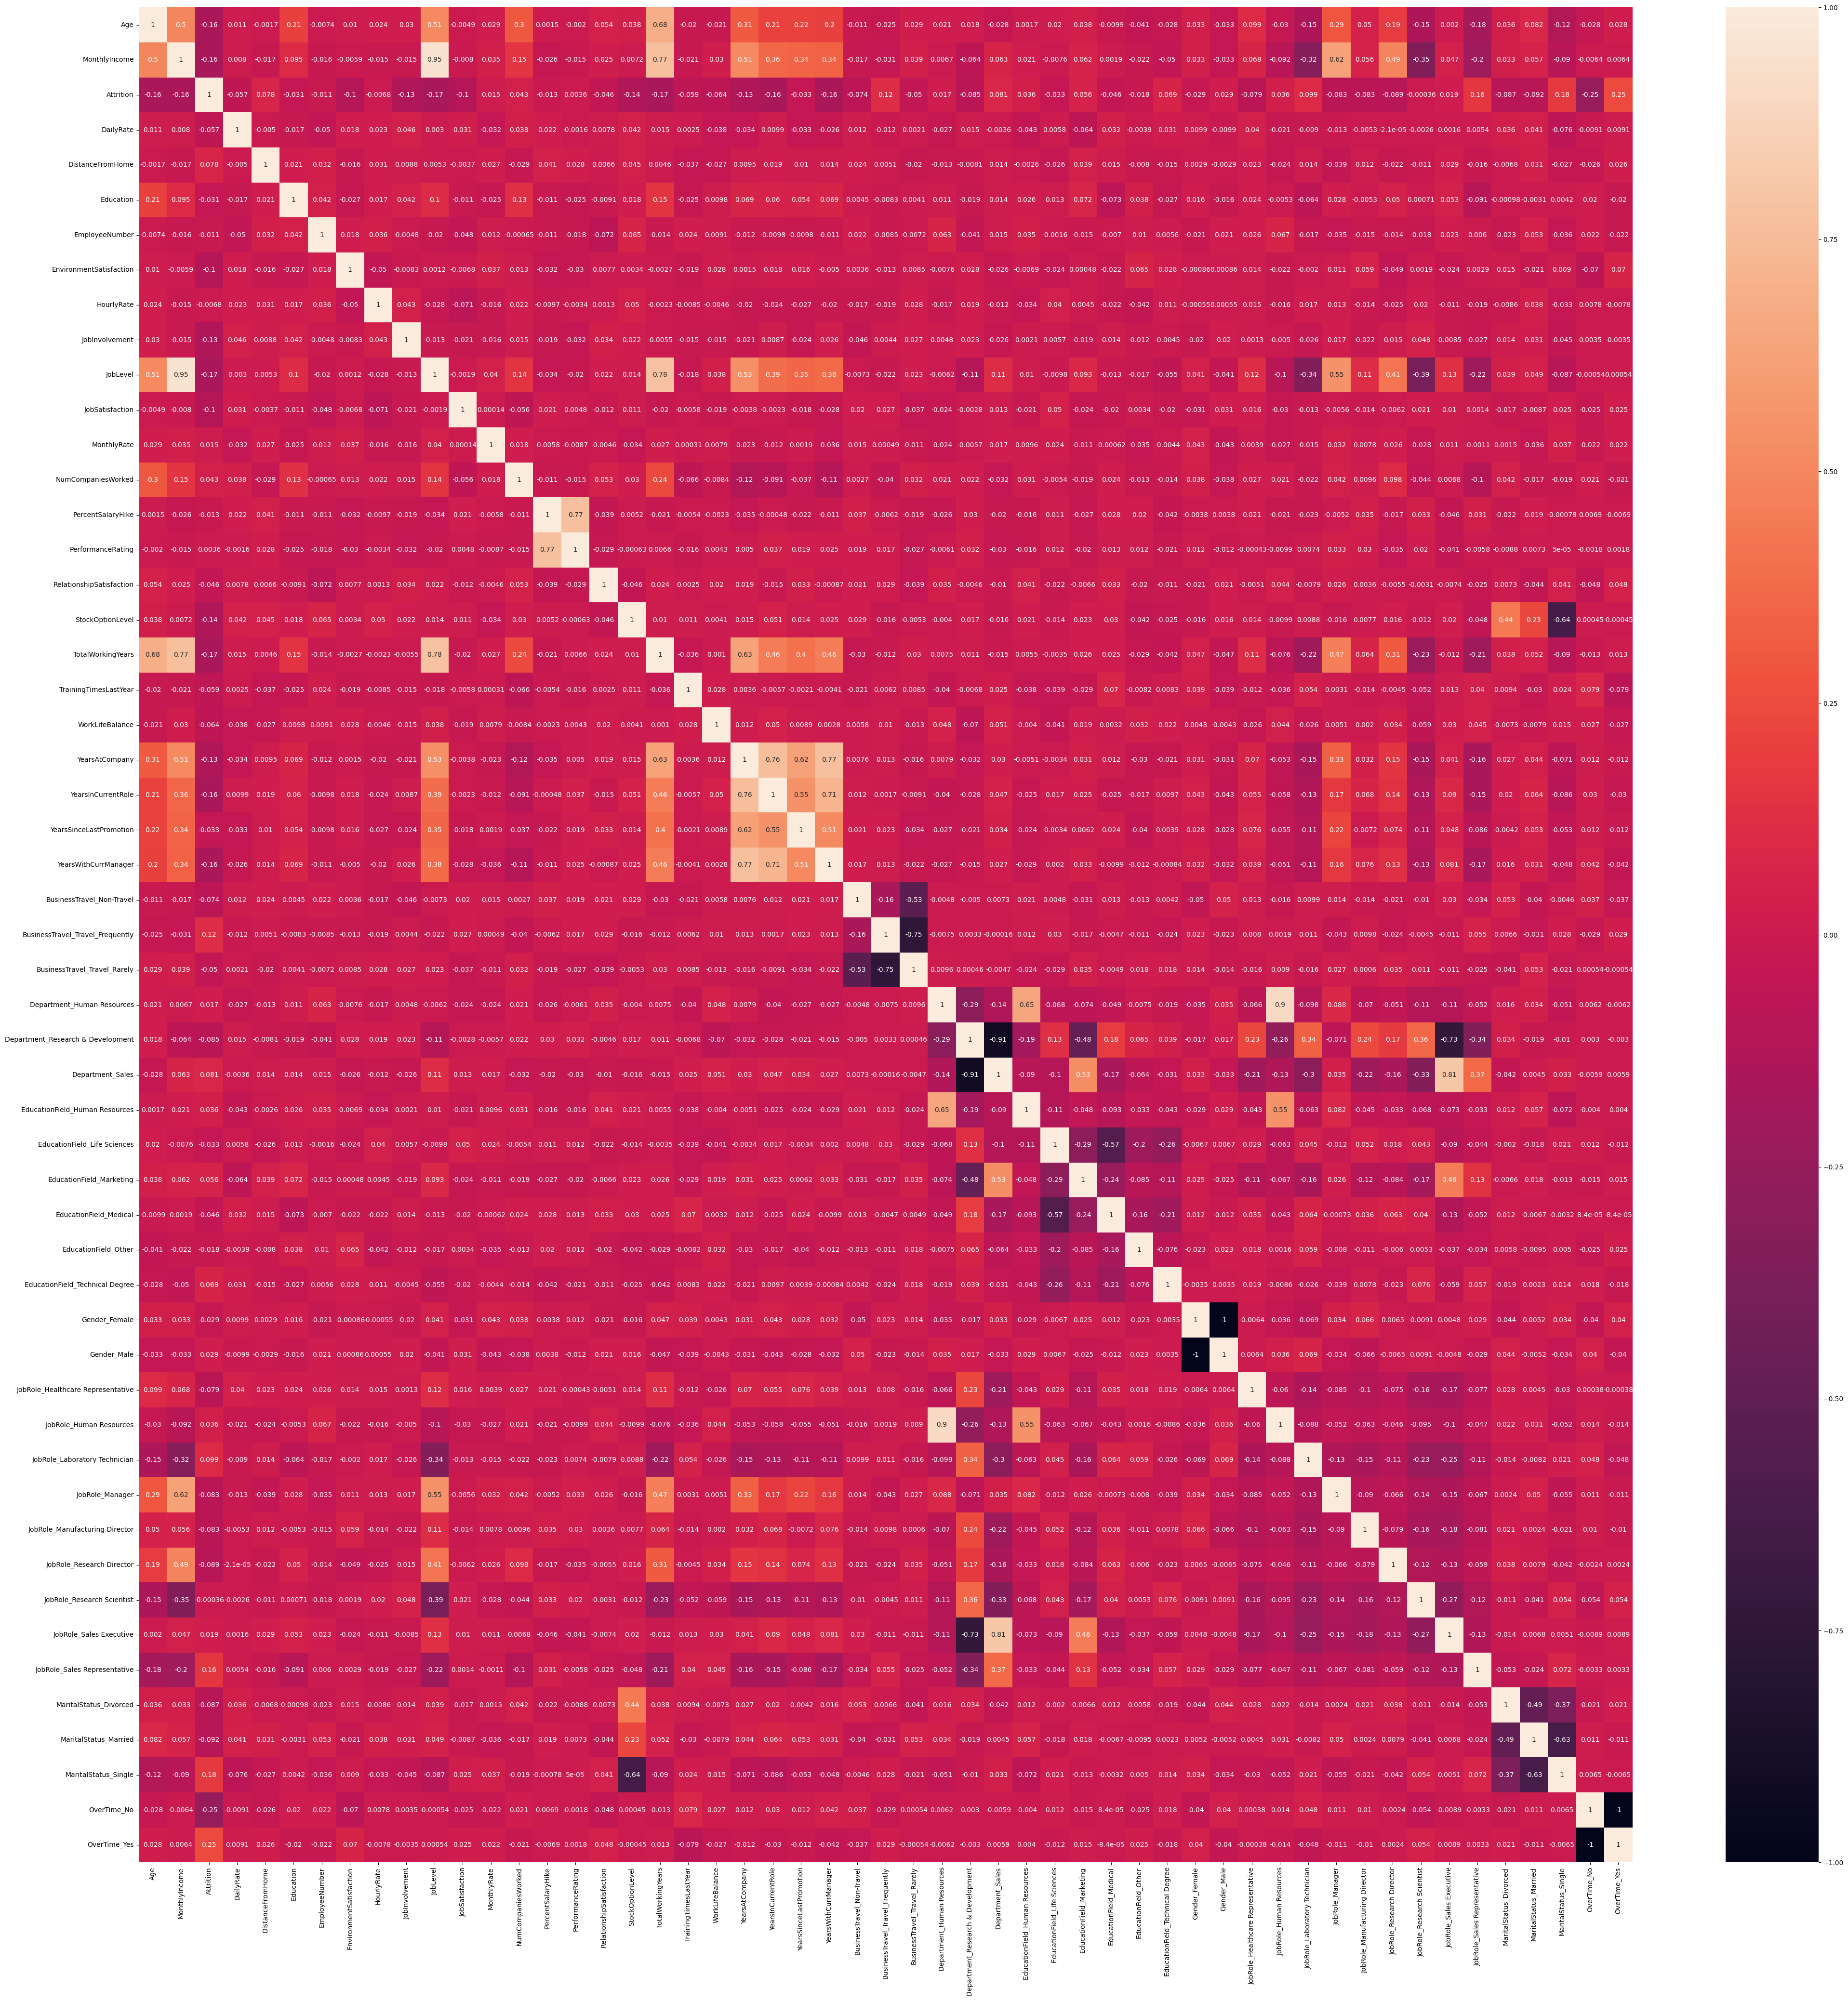

In [87]:
import seaborn as sns

correlaciones = df_clean.corr()

f,ax = plt.subplots(figsize = (50,50))
sns.heatmap(correlaciones, annot=True)


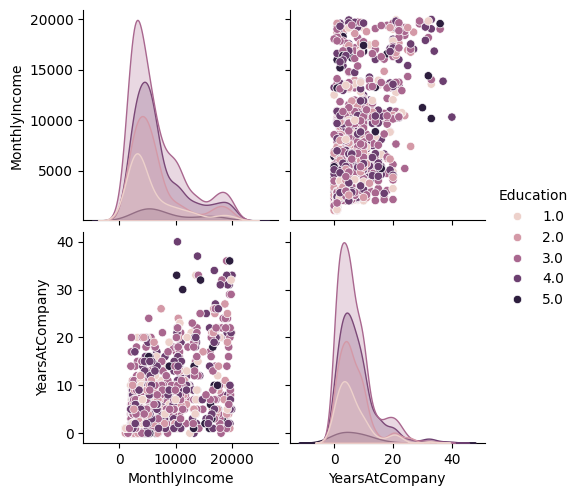

In [88]:
sns.pairplot(df_clean,hue="Education", vars=["MonthlyIncome", "YearsAtCompany"])

In [91]:
df_clean[["MonthlyIncome","YearsAtCompany"]].corr()

,MonthlyIncome,YearsAtCompany
MonthlyIncome,1.000000,0.513953
YearsAtCompany,0.513953,1.000000


# Sub dividir mi dataset

In [ ]:
x = df_clean[[]] # Variables independientes
y = df_clean[[]] # Variables dependientes